In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols #For n-way ANOVA
from statsmodels.stats.anova import _get_covariance, anova_lm #for n-way ANOVA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
#Import dataset and store in variable called df

from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Capstone Project/Social+Media+Data+for+DSBA.csv')

Mounted at /content/drive


In [4]:
dataset.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,11760.0,1.005880e+06,3394.963917,1000001.0,1002940.75,1005880.5,1008820.25,1011760.0
Yearly_avg_view_on_travel_page,11179.0,2.808308e+02,68.182958,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,2.817048e+04,14385.032134,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,7.479003e+01,24.026650,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6.531699e+03,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571e+00,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,2.866156e+01,48.660504,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712245e+00,1.080887,1.0,2.00,3.0,4.00,4.0
Adult_flag,11760.0,7.938776e-01,0.851823,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,1.381743e+01,9.070657,0.0,8.00,12.0,18.00,270.0


In [7]:
dataset.describe(include=["object","category"])

,Taken_product,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,following_company_page,working_flag
count,11760,11707,11685,11760,11729,11657,11760
unique,2,10,30,7,15,4,2
top,No,Tab,1,3,Beach,No,No
freq,9864,4172,4543,4561,2424,8355,9952


In [8]:
dataset.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [9]:
# To check unique values in each column

for i in dataset.columns:
    if dataset[i].dtype == 'object':
        print(i)
        print(dataset[i].unique())
        print()

Taken_product
['Yes' 'No']

preferred_device
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile']

yearly_avg_Outstation_checkins
['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']

member_in_family
['2' '1' '4' 'Three' '3' '5' '10']

preferred_location_type
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']

following_company_page
['Yes' 'No' nan '1' '0']

working_flag
['No' 'Yes']



#Cleaning the data

In [10]:
#Dropping out the unwanted(that does not contribute to any analysis) variable
dataset = dataset.drop('UserID',axis=1)

In [11]:
dataset['Taken_product'] = dataset['Taken_product'].replace('Yes','1')
dataset['Taken_product'] = dataset['Taken_product'].replace('No','0')

In [12]:
dataset['member_in_family'] = dataset['member_in_family'].replace('Three','3')

In [13]:
dataset['following_company_page'] = dataset['following_company_page'].replace('Yes','1')
dataset['following_company_page'] = dataset['following_company_page'].replace('No','0')

In [14]:
dataset['working_flag'] = dataset['working_flag'].replace('Yes','1')
dataset['working_flag'] = dataset['working_flag'].replace('No','0')

In [15]:
dataset['yearly_avg_Outstation_checkins'] = dataset['yearly_avg_Outstation_checkins'].replace('*',np.nan)

In [16]:
dataset['preferred_location_type'] = dataset['preferred_location_type'].replace('Tour  Travel','Tour and Travel')
dataset['preferred_location_type'] = dataset['preferred_location_type'].replace('Game','Entertainment')
dataset['preferred_location_type'] = dataset['preferred_location_type'].replace('Movie','Entertainment')

In [17]:
dataset['Adult_flag'] = dataset['Adult_flag'].replace(1,0)
dataset['Adult_flag'] = dataset['Adult_flag'].replace(2,1)
dataset['Adult_flag'] = dataset['Adult_flag'].replace(3,1)

In [18]:
dataset['Adult_flag'].unique()

array([0, 1])

In [19]:
for i in dataset.columns:
    if dataset[i].dtype == 'object':
        print(i)
        print(dataset[i].unique())
        print()

Taken_product
['1' '0']

preferred_device
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile']

yearly_avg_Outstation_checkins
['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '5' '8' '2' '3' '9' '7' '6' '4']

member_in_family
['2' '1' '4' '3' '5' '10']

preferred_location_type
['Financial' 'Other' 'Medical' nan 'Entertainment' 'Social media'
 'Tour and Travel' 'OTT' 'Beach' 'Historical site' 'Big Cities' 'Trekking'
 'Hill Stations']

following_company_page
['1' '0' nan]

working_flag
['0' '1']



In [20]:
#Duplicated Rows Checking
duplicate = dataset.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

Number of duplicate rows = 1035


In [21]:
#Replacing NaN Values
dataset['preferred_location_type'] = dataset['preferred_location_type'].replace(np.nan,dataset['preferred_location_type'].mode()[0])
dataset['preferred_location_type'].unique()

array(['Financial', 'Other', 'Medical', 'Beach', 'Entertainment',
       'Social media', 'Tour and Travel', 'OTT', 'Historical site',
       'Big Cities', 'Trekking', 'Hill Stations'], dtype=object)

In [22]:
dataset['yearly_avg_Outstation_checkins'] = dataset['yearly_avg_Outstation_checkins'].replace(np.nan,dataset['yearly_avg_Outstation_checkins'].mode()[0])
dataset['yearly_avg_Outstation_checkins'].unique()

array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
       '25', '12', '18', '29', '22', '14', '20', '28', '17', '13', '5',
       '8', '2', '3', '9', '7', '6', '4'], dtype=object)

In [23]:
dataset['following_company_page'] = dataset['following_company_page'].replace(np.nan,dataset['following_company_page'].mode()[0])
dataset['following_company_page'].unique()

array(['1', '0'], dtype=object)

In [24]:
dataset['preferred_device'] = dataset['preferred_device'].replace(np.nan,dataset['preferred_device'].mode()[0])

In [25]:
#Replacing Values Preferred Device Column
dataset['preferred_device'] = dataset['preferred_device'].replace("iOS and Android","Mobile")
dataset['preferred_device'] = dataset['preferred_device'].replace("iOS","Mobile")
dataset['preferred_device'] = dataset['preferred_device'].replace("ANDROID","Mobile")
dataset['preferred_device'] = dataset['preferred_device'].replace("Tab","Mobile")
dataset['preferred_device'] = dataset['preferred_device'].replace("Android","Mobile")
dataset['preferred_device'] = dataset['preferred_device'].replace("Android OS","Mobile")
dataset['preferred_device'] = dataset['preferred_device'].replace("Other","Mobile")
dataset['preferred_device'] = dataset['preferred_device'].replace("Others","Mobile")
dataset['preferred_device'].unique()

array(['Mobile', 'Laptop'], dtype=object)

In [26]:
#Converting data types
#dataset['Taken_product'] = pd.Categorical(dataset['Taken_product'])
dataset['Adult_flag'] = pd.Categorical(dataset['Adult_flag'])
dataset['working_flag'] = pd.Categorical(dataset['working_flag'])
dataset['member_in_family'] = pd.Categorical(dataset['member_in_family'])
dataset['following_company_page'] = pd.Categorical(dataset['following_company_page'])

In [27]:
dataset['yearly_avg_Outstation_checkins'] = dataset['yearly_avg_Outstation_checkins'].astype(int)
dataset['Taken_product'] = dataset['Taken_product'].astype(int)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Taken_product                                 11760 non-null  int64   
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64 
 2   preferred_device                              11760 non-null  object  
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64 
 4   yearly_avg_Outstation_checkins                11760 non-null  int64   
 5   member_in_family                              11760 non-null  category
 6   preferred_location_type                       11760 non-null  object  
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64 
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64   
 9   week_since_last_outstation_checkin            1176

In [29]:
 # checking null values
dataset.isnull().sum()

Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                  0
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                    0
member_in_family                                  0
preferred_location_type                           0
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                            0
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [30]:
dataset['Yearly_avg_view_on_travel_page'] = dataset['Yearly_avg_view_on_travel_page'].replace(np.nan,dataset['Yearly_avg_view_on_travel_page'].median())
dataset['total_likes_on_outstation_checkin_given'] = dataset['total_likes_on_outstation_checkin_given'].replace(np.nan,dataset['total_likes_on_outstation_checkin_given'].median())
dataset['Yearly_avg_comment_on_travel_page'] = dataset['Yearly_avg_comment_on_travel_page'].replace(np.nan,dataset['Yearly_avg_comment_on_travel_page'].median())

In [31]:
dataset.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

## **Univariate Analysis**

In [ ]:
# For Continous Variables

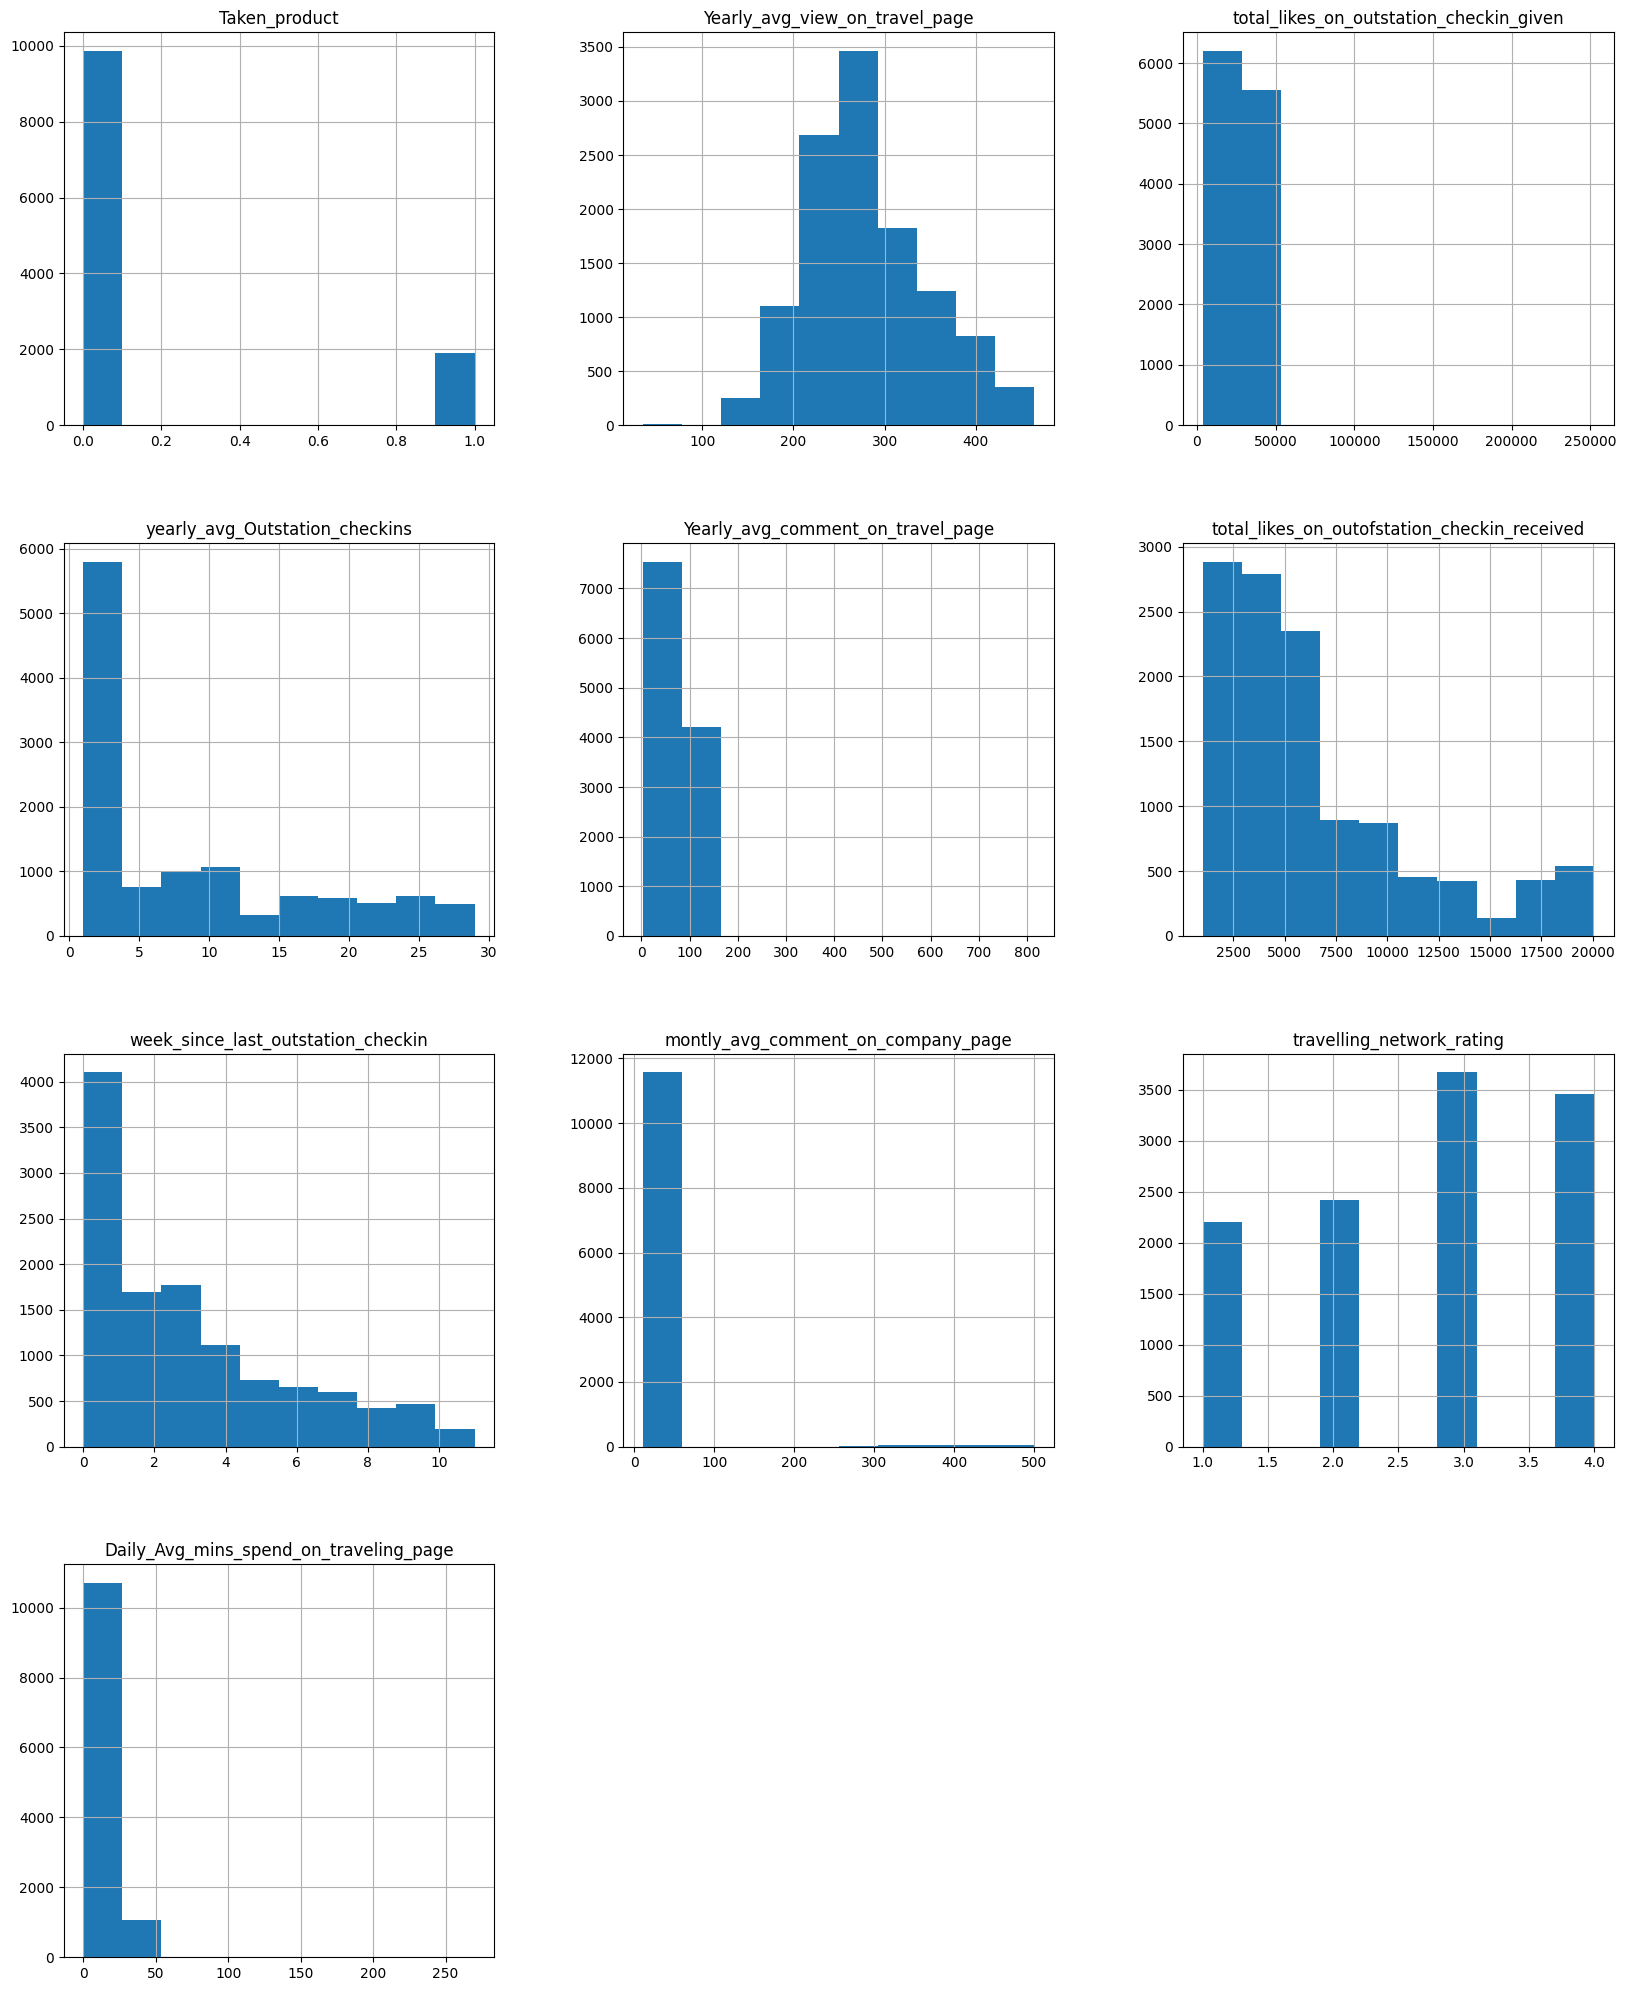

In [ ]:
dataset.hist(column = dataset.columns, figsize=(20,25));

In [ ]:
# Measuring the skeweness of the required columns for evaluation
Skewness = pd.DataFrame({'Skewness' : [stats.skew(dataset.Yearly_avg_view_on_travel_page),stats.skew(dataset.total_likes_on_outstation_checkin_given),
                                       stats.skew(dataset.yearly_avg_Outstation_checkins),stats.skew(dataset.Yearly_avg_comment_on_travel_page),
                                       stats.skew(dataset.total_likes_on_outofstation_checkin_received),stats.skew(dataset.week_since_last_outstation_checkin),
                                       stats.skew(dataset.montly_avg_comment_on_company_page),
                                      stats.skew(dataset.travelling_network_rating),
                                      stats.skew(dataset.Daily_Avg_mins_spend_on_traveling_page)]},
                        index=['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
                               'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page',
                               'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin',
                               'montly_avg_comment_on_company_page', 'travelling_network_rating',
                               'Daily_Avg_mins_spend_on_traveling_page'])
Skewness

,Skewness
Yearly_avg_view_on_travel_page,0.446079
total_likes_on_outstation_checkin_given,0.498350
yearly_avg_Outstation_checkins,0.977120
Yearly_avg_comment_on_travel_page,4.910321
total_likes_on_outofstation_checkin_received,1.368404
week_since_last_outstation_checkin,0.915217
montly_avg_comment_on_company_page,7.683170
travelling_network_rating,-0.302518
Daily_Avg_mins_spend_on_traveling_page,4.480111


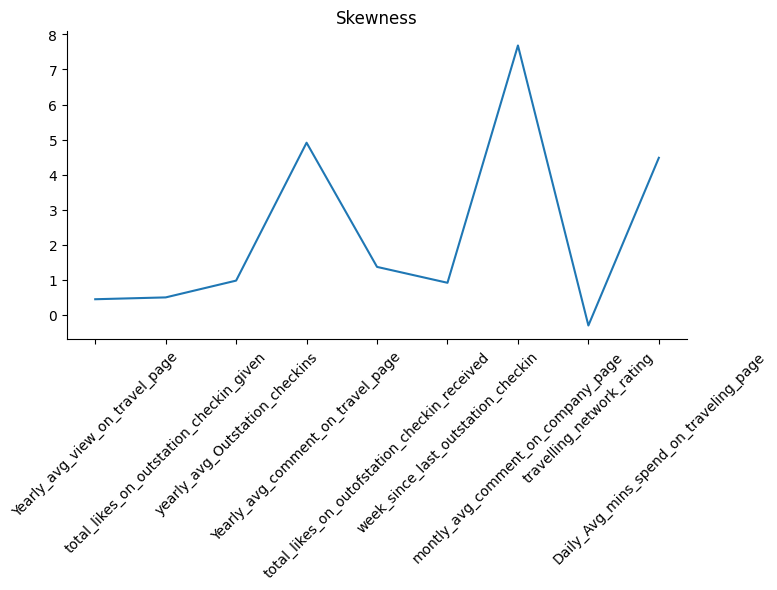

In [ ]:
# Skewness

from matplotlib import pyplot as plt
Skewness['Skewness'].plot(kind='line', figsize=(8, 4), title='Skewness')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# For Categorical Variables

Text(0, 0.5, 'Count')

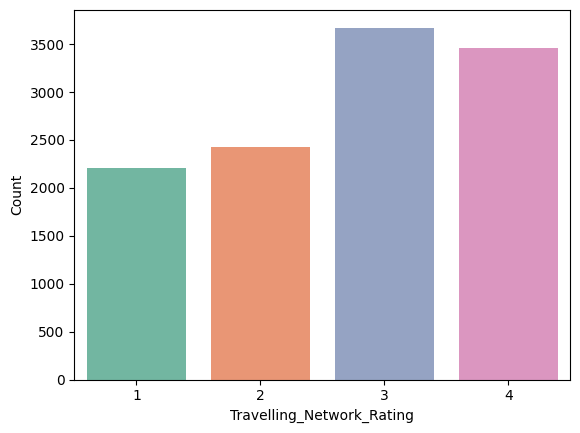

In [ ]:
sns.countplot(x='travelling_network_rating', data=dataset, palette='Set2')
plt.xlabel('Travelling_Network_Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

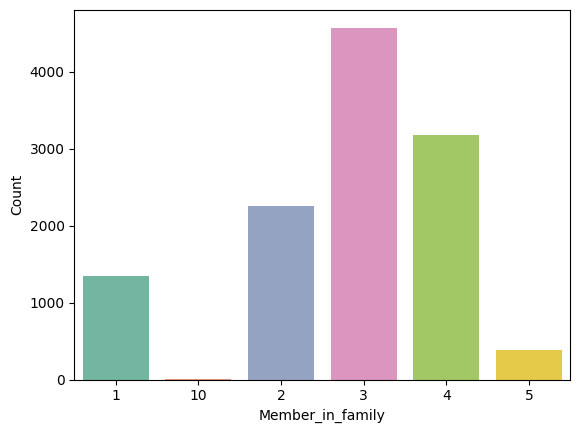

In [ ]:
sns.countplot(x='member_in_family', data=dataset, palette='Set2')
plt.xlabel('Member_in_family')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

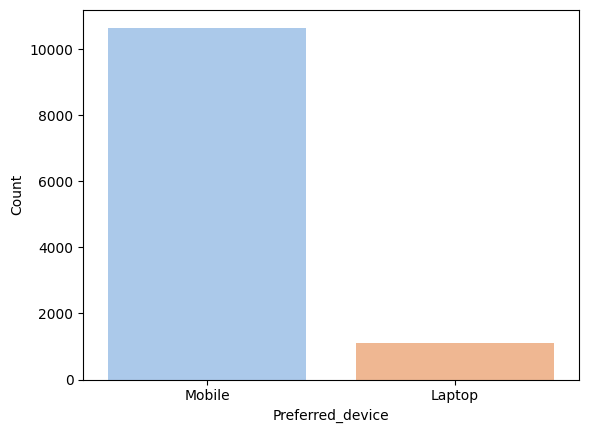

In [ ]:
sns.countplot(x='preferred_device', data=dataset, palette='pastel')
plt.xlabel('Preferred_device')
plt.ylabel('Count')

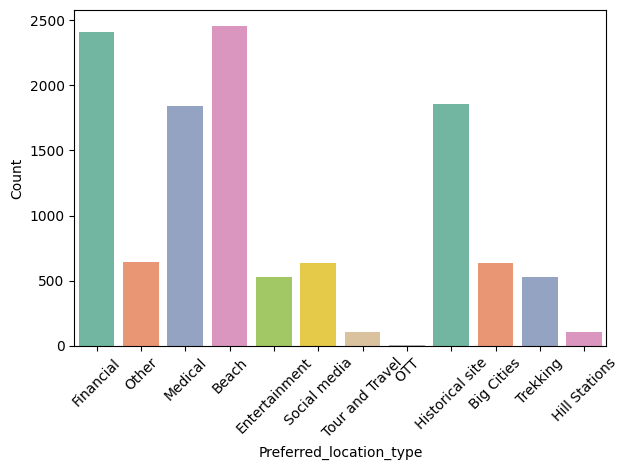

In [ ]:
sns.countplot(x='preferred_location_type', data=dataset, palette='Set2')
plt.xlabel('Preferred_location_type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
dataset.to_csv('tableau_file.csv',index=True)

## **Bivariate Analysis**

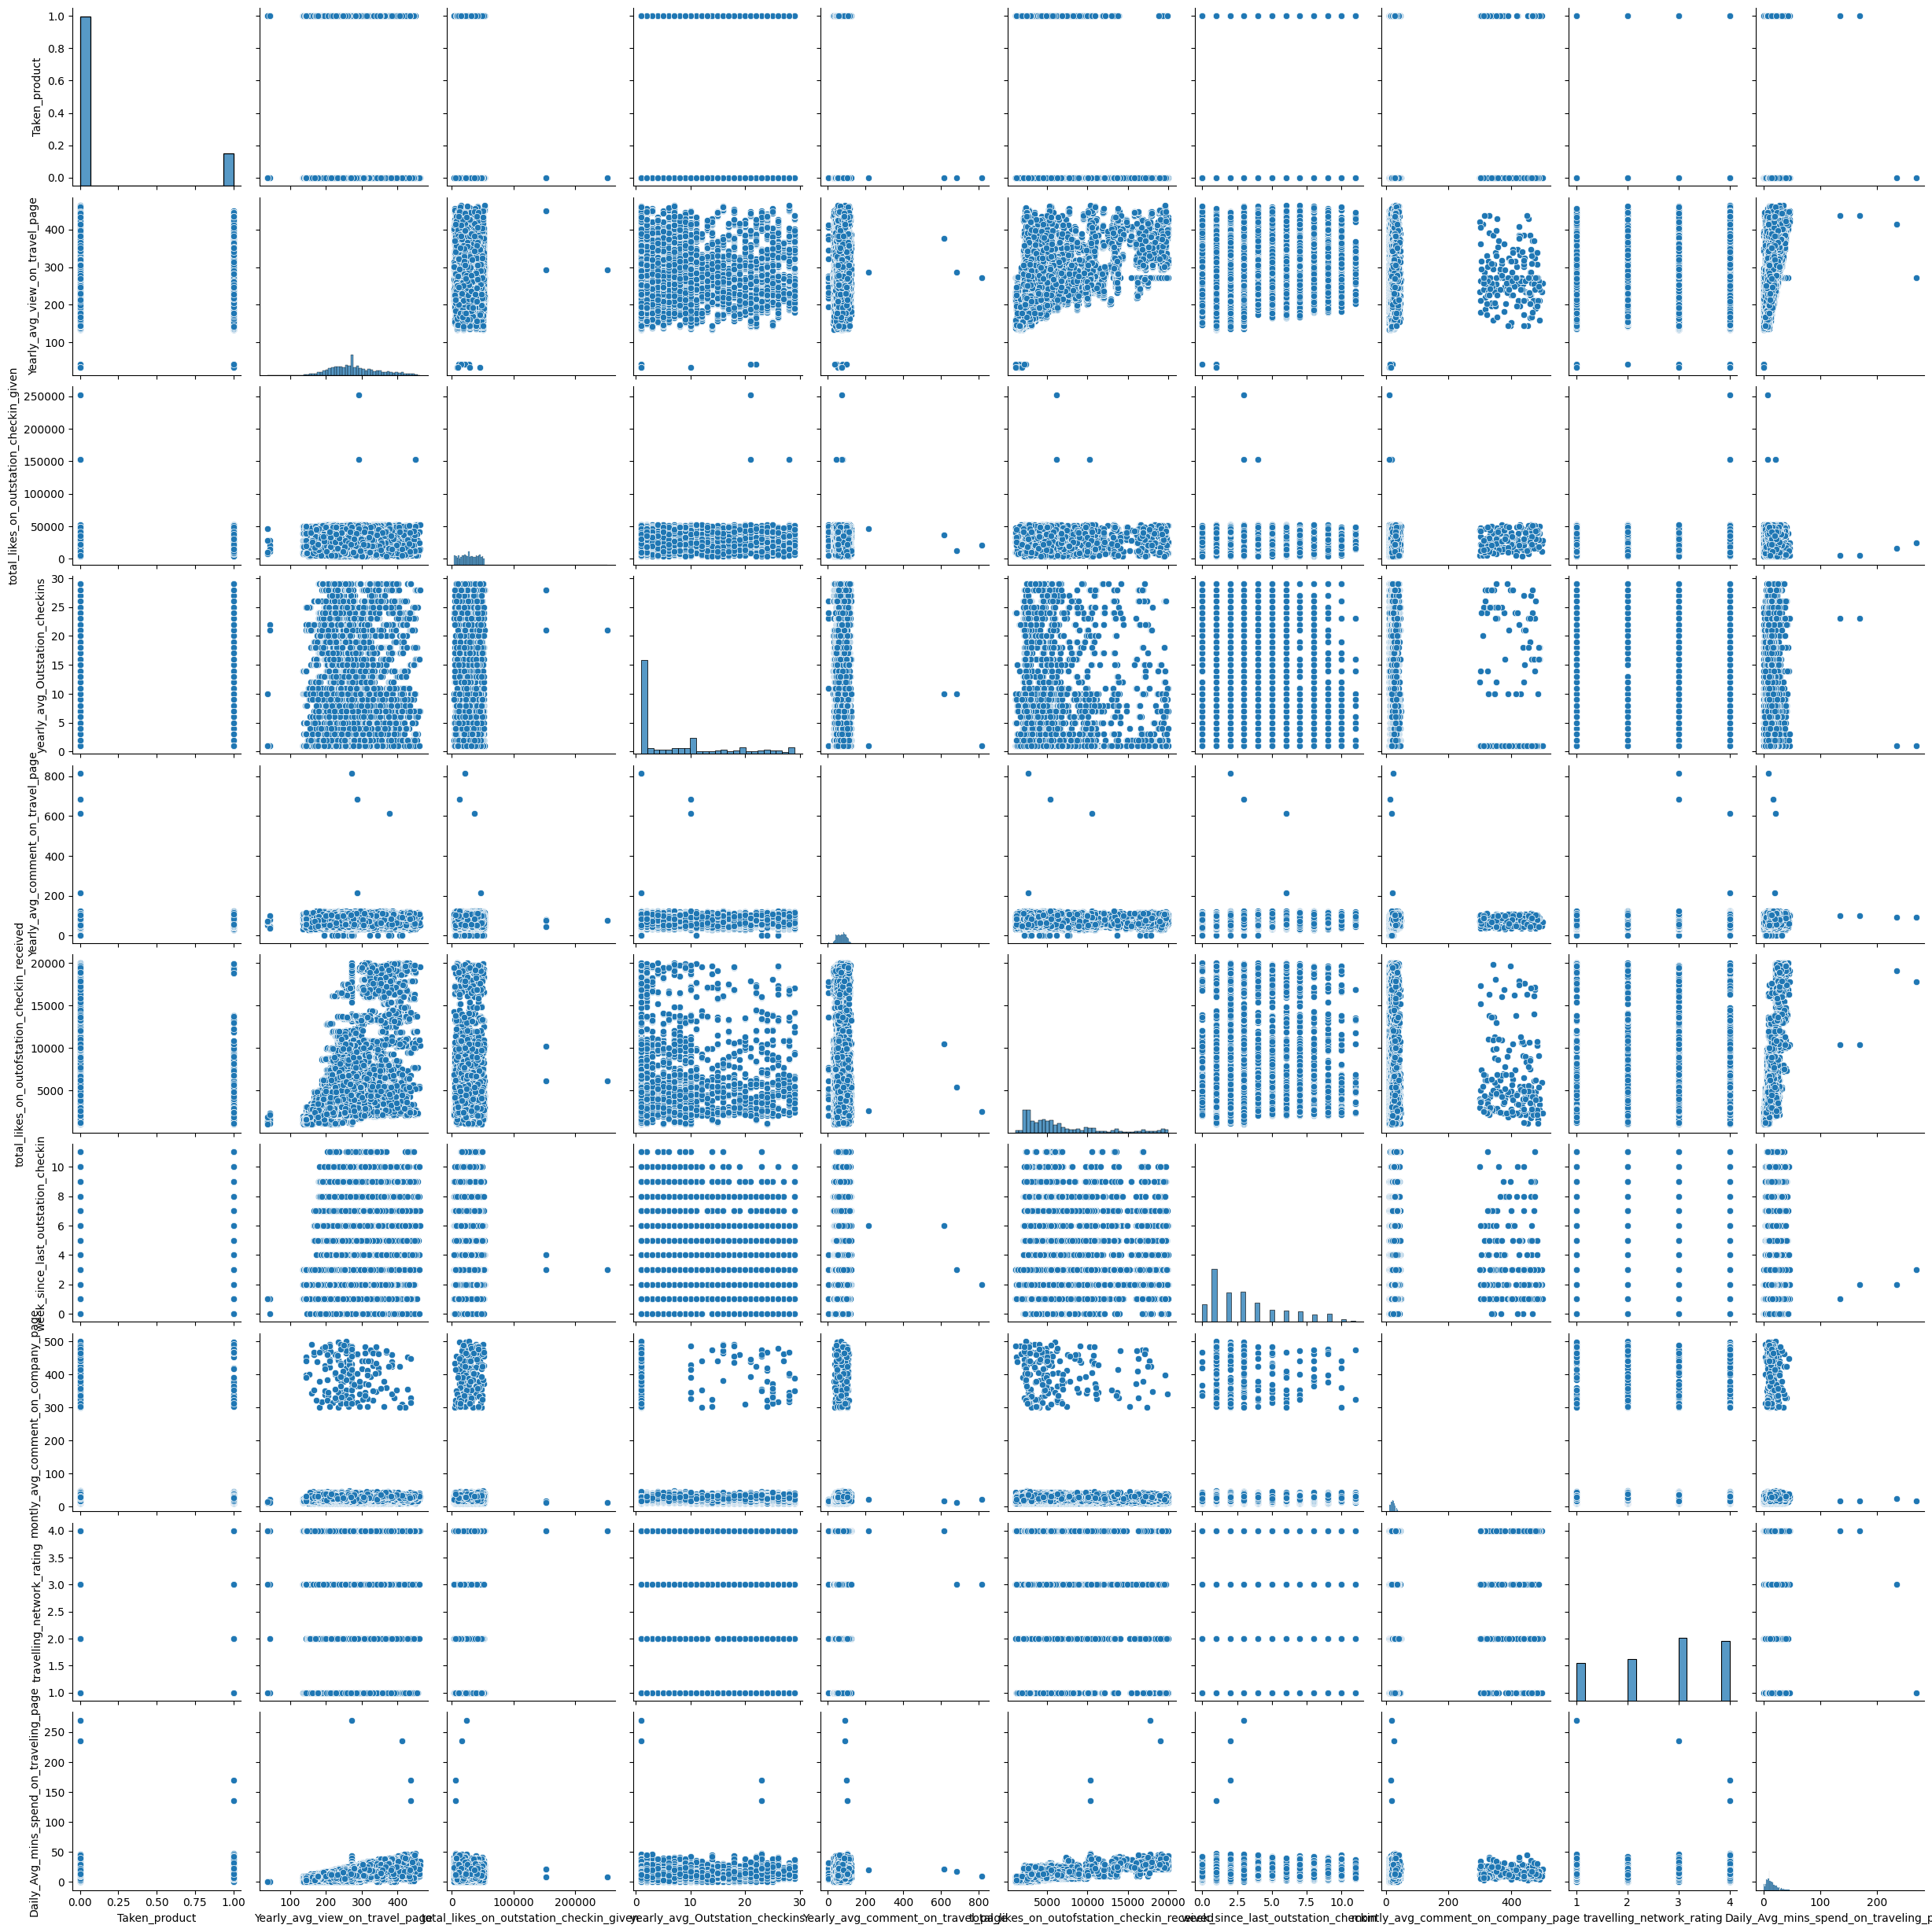

In [ ]:
sns.pairplot(dataset)
plt.show()

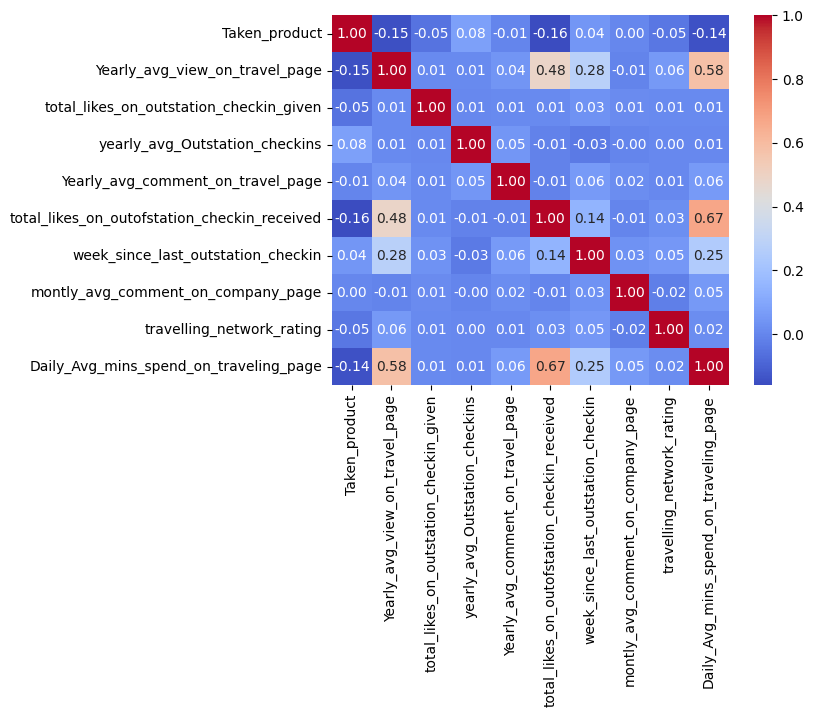

In [ ]:
numeric_dataset = dataset.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_dataset.corr(), annot=True, fmt=".2f", cmap='coolwarm');

## **Multivariate Analysis**

Text(0, 0.5, 'Preferred Device')

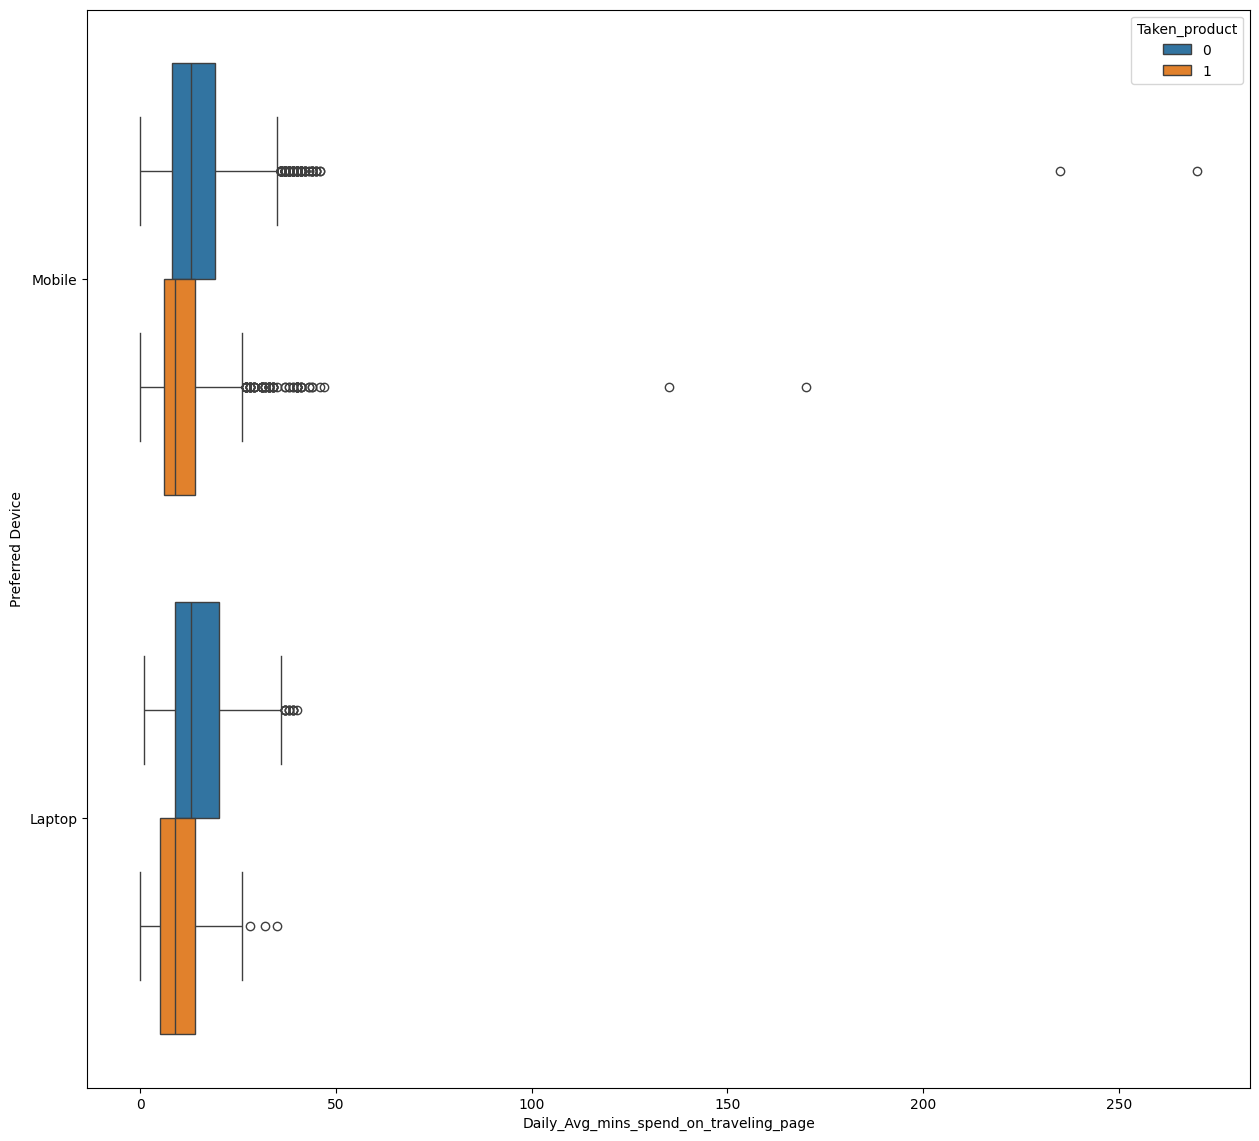

In [ ]:
plt.figure(figsize=(15,14))
sns.boxplot(x="Daily_Avg_mins_spend_on_traveling_page", y="preferred_device", hue="Taken_product", data=dataset)
plt.ylabel('Preferred Device')

Text(0, 0.5, 'Preferred Device')

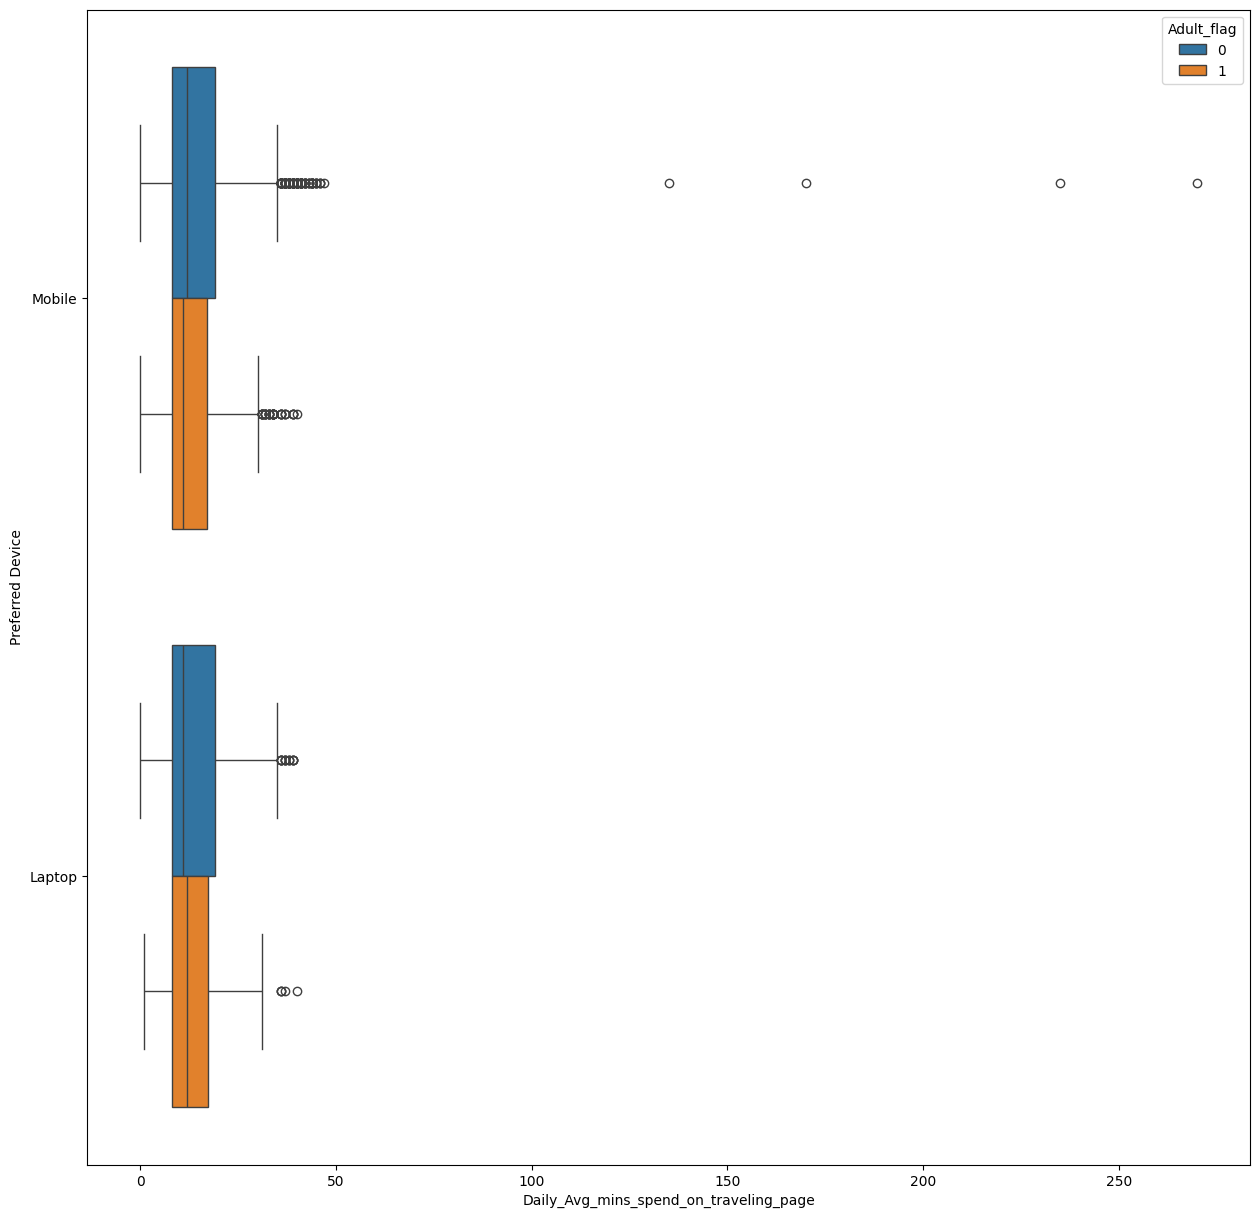

In [ ]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Daily_Avg_mins_spend_on_traveling_page", y="preferred_device", hue="Adult_flag", data=dataset)
plt.ylabel('Preferred Device')

Text(0, 0.5, 'Preferred Device')

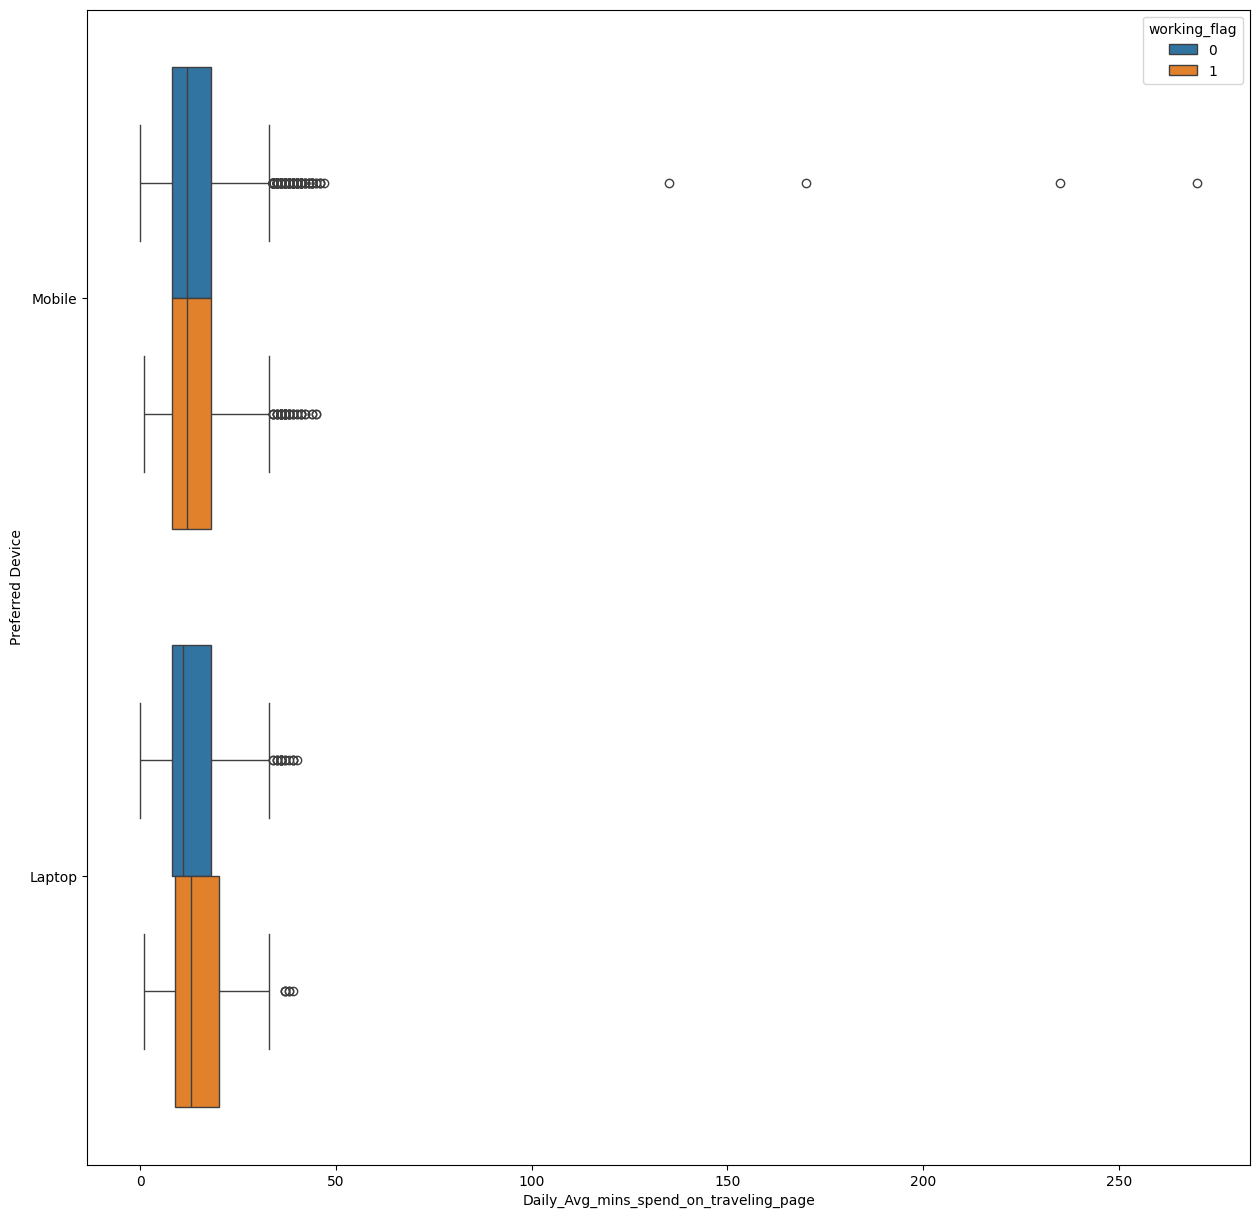

In [ ]:
plt.figure(figsize=(15,15))
sns.boxplot(x = 'Daily_Avg_mins_spend_on_traveling_page', y ='preferred_device', hue='working_flag', data = dataset)
plt.ylabel('Preferred Device')

## **Outlier Treatment**

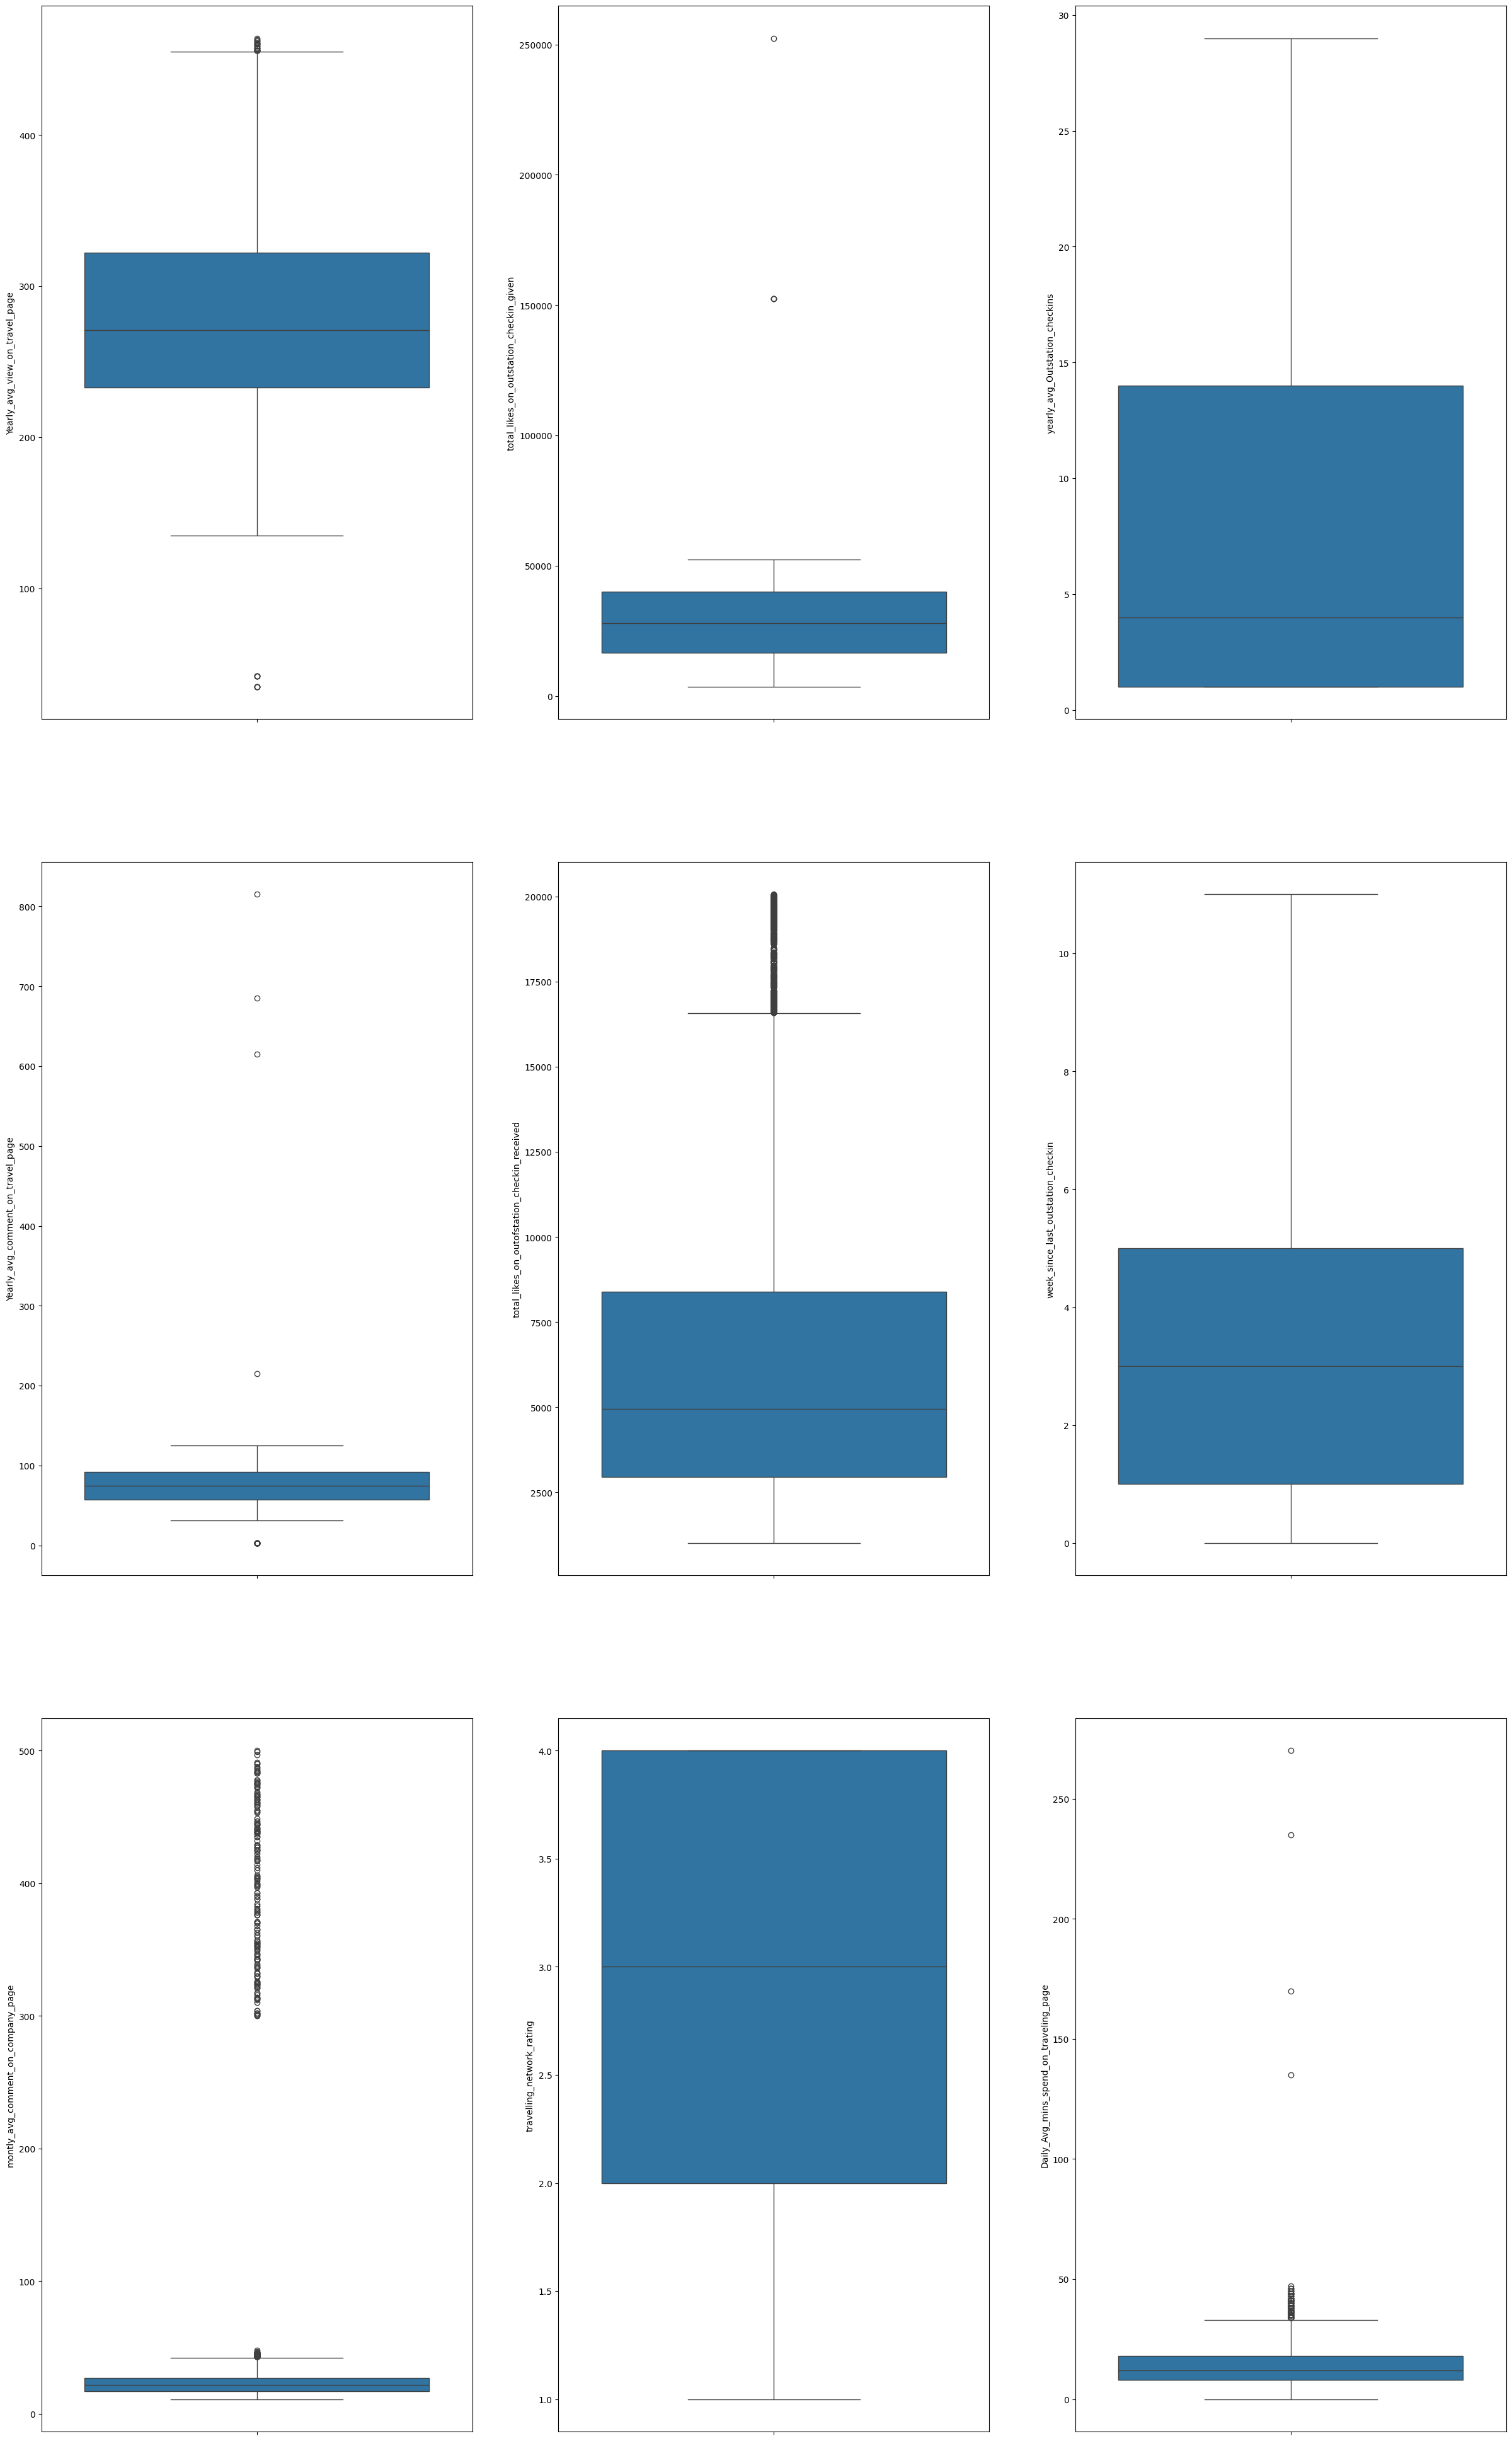

In [ ]:
plt.figure(figsize=(30,50))

My_coulmns = ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
                               'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page',
                               'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin',
                               'montly_avg_comment_on_company_page', 'travelling_network_rating',
                               'Daily_Avg_mins_spend_on_traveling_page']
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.boxplot(dataset[My_coulmns[i]])

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
list_num=['Yearly_avg_view_on_travel_page','total_likes_on_outstation_checkin_given','yearly_avg_Outstation_checkins',
          'Yearly_avg_comment_on_travel_page','total_likes_on_outofstation_checkin_received',
          'week_since_last_outstation_checkin','montly_avg_comment_on_company_page','travelling_network_rating',
          'Daily_Avg_mins_spend_on_traveling_page']
for i in list_num:
    LL, UL = remove_outlier(dataset[i])
    dataset[i]= np.where(dataset[i] > UL, UL, dataset[i])
    dataset[i]= np.where(dataset[i] < LL, LL, dataset[i])

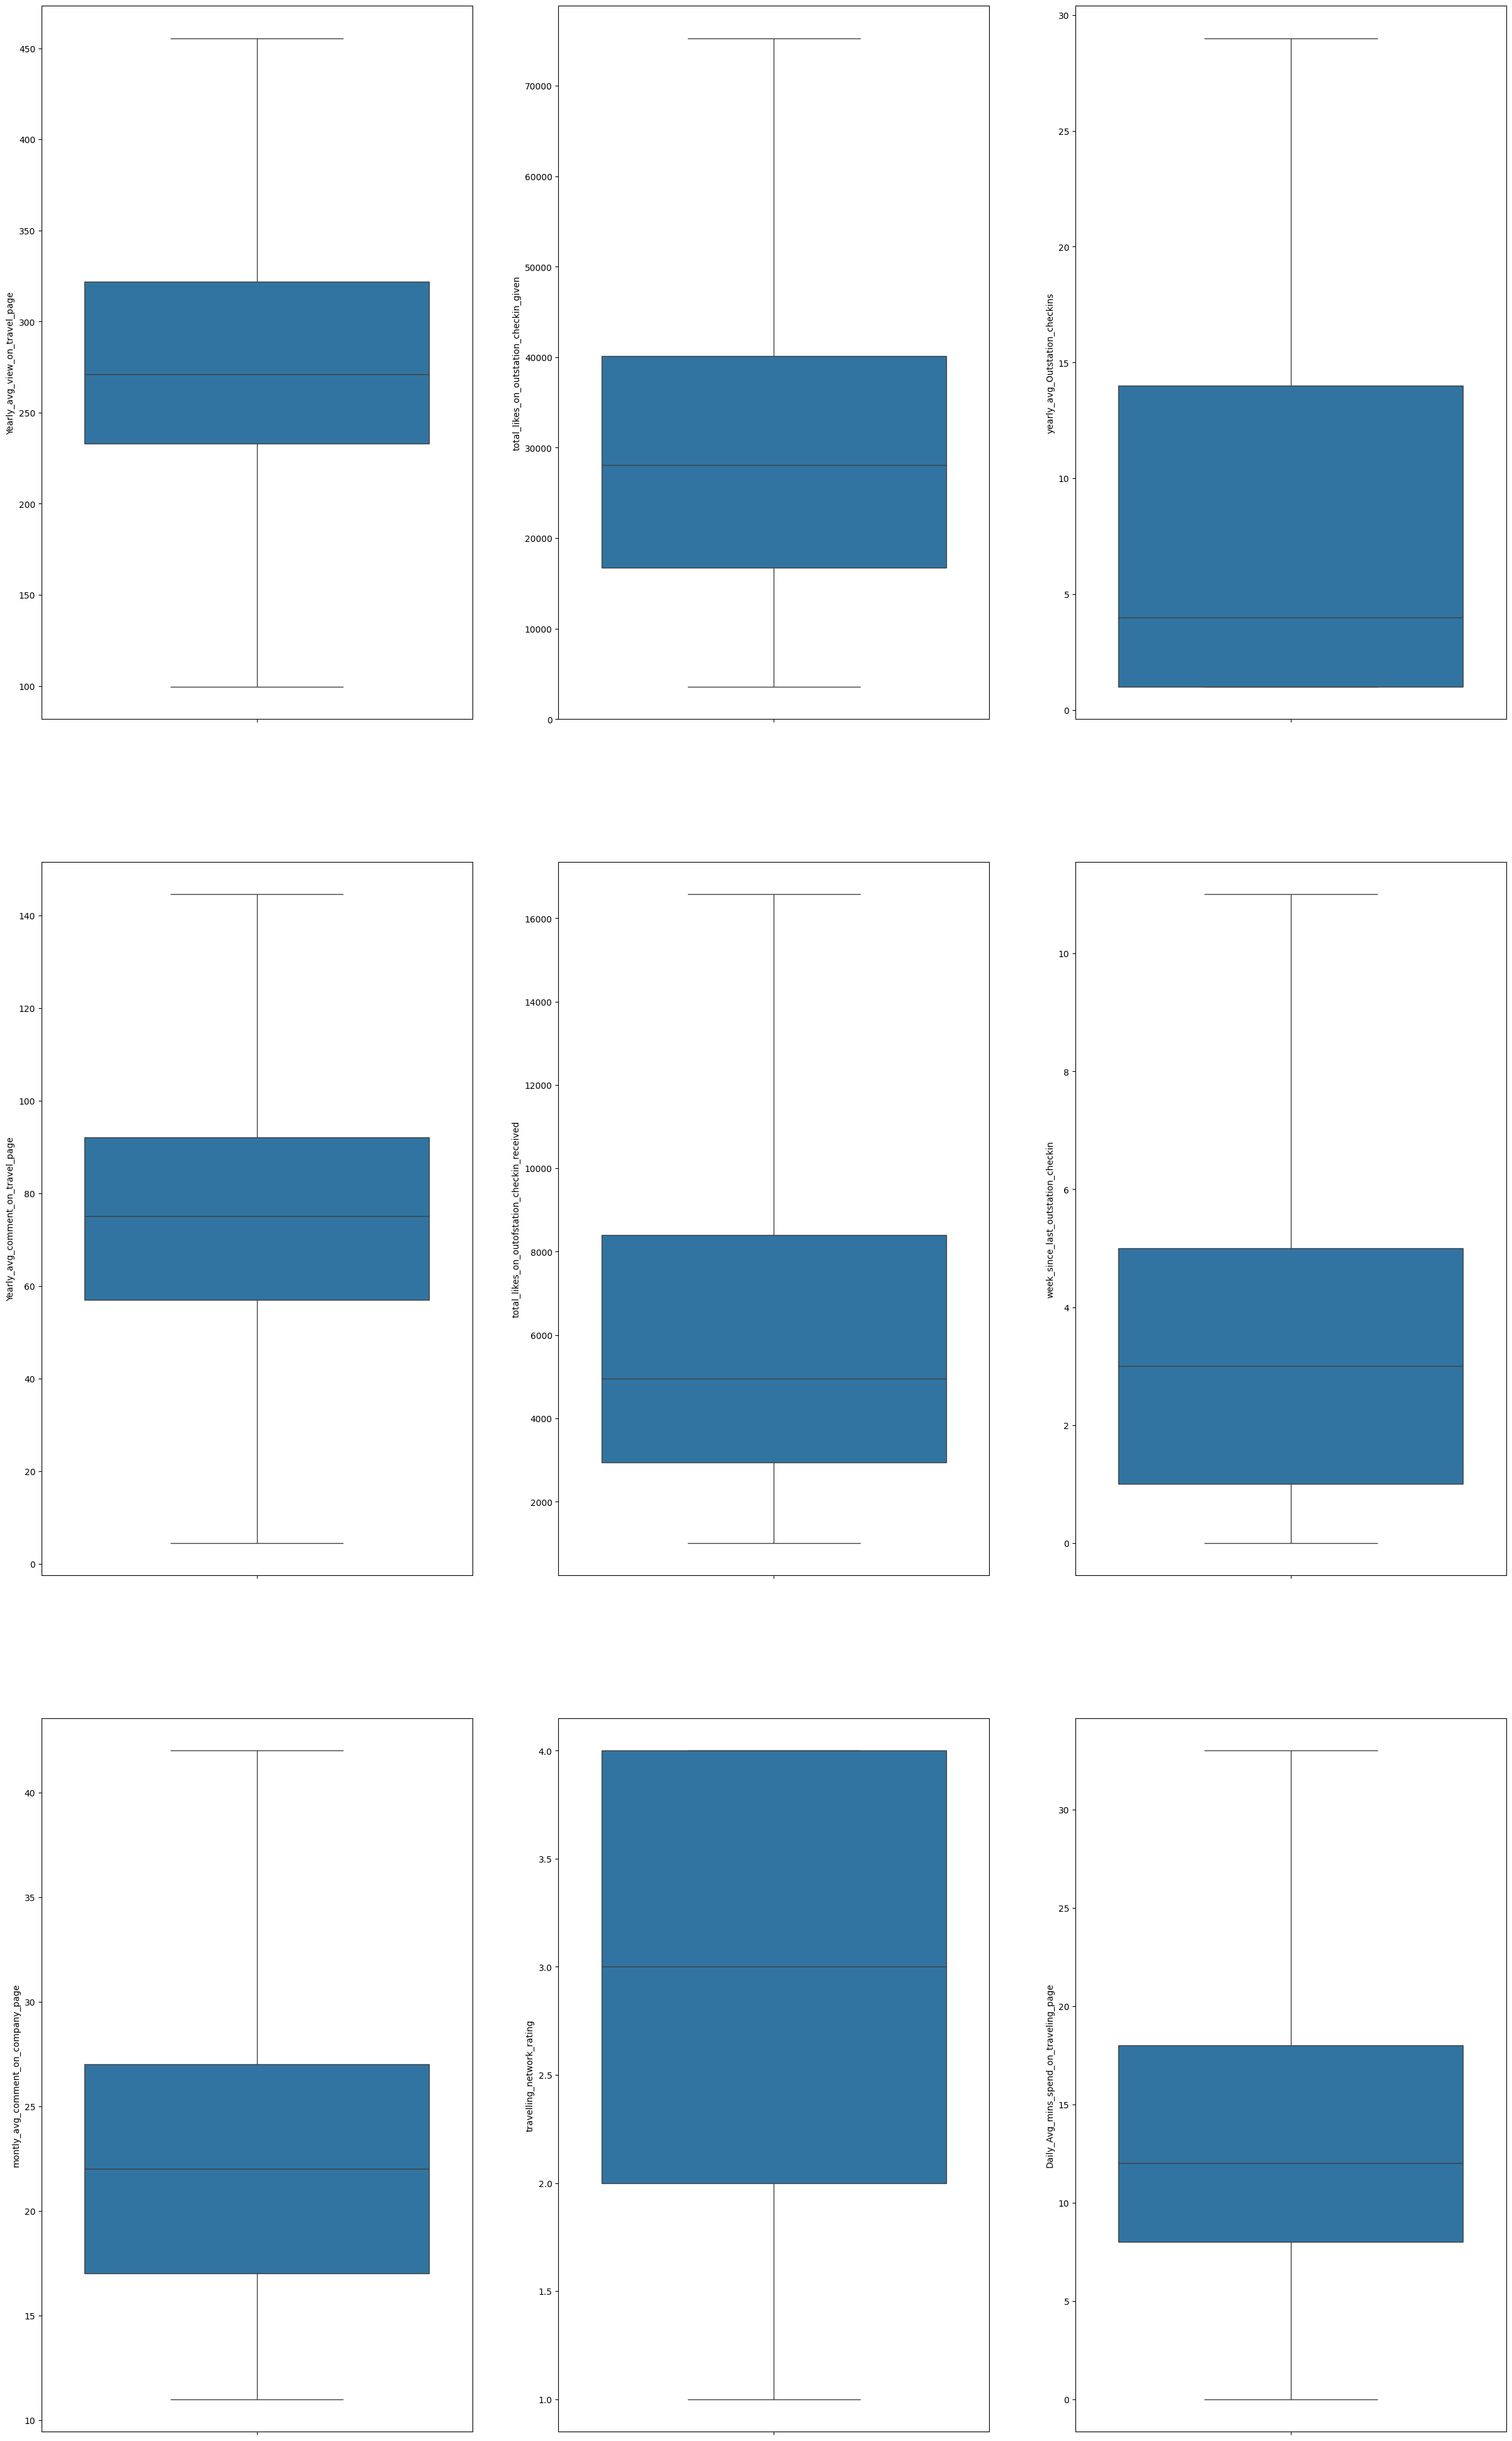

In [ ]:
plt.figure(figsize=(30,50))

My_coulmns = ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
                               'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page',
                               'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin',
                               'montly_avg_comment_on_company_page', 'travelling_network_rating',
                               'Daily_Avg_mins_spend_on_traveling_page']
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.boxplot(dataset[My_coulmns[i]])

## **Data Standardization**

In [ ]:
dataset.describe()

,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page
count,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,0.161224,280.385587,28132.657058,8.176871,74.649320,6387.709439,3.203571,22.854422,2.712245,13.633673
std,0.367754,66.347859,13883.783884,8.663686,21.526694,4345.180379,2.616365,7.354454,1.080887,7.980341
min,0.000000,99.500000,3570.000000,1.000000,4.500000,1009.000000,0.000000,11.000000,1.000000,0.000000
25%,0.000000,233.000000,16697.250000,1.000000,57.000000,2940.750000,1.000000,17.000000,2.000000,8.000000
50%,0.000000,271.000000,28076.000000,4.000000,75.000000,4948.000000,3.000000,22.000000,3.000000,12.000000
75%,0.000000,322.000000,40115.250000,14.000000,92.000000,8393.250000,5.000000,27.000000,4.000000,18.000000
max,1.000000,455.500000,75242.250000,29.000000,144.500000,16572.000000,11.000000,42.000000,4.000000,33.000000


In [ ]:
list_numeric= []
for i in dataset.columns:
    if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
        list_numeric.append(i)
print(list_numeric)

['Taken_product', 'Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin', 'montly_avg_comment_on_company_page', 'travelling_network_rating', 'Daily_Avg_mins_spend_on_traveling_page']


In [ ]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
df= pd.DataFrame(scale.fit_transform(dataset[list_numeric]), columns= list_numeric)
df.head().T

,0,1,2,3,4
Taken_product,2.280906,-0.438422,2.280906,-0.438422,-0.438422
Yearly_avg_view_on_travel_page,0.401152,1.305515,-0.051030,-0.503212,-1.181484
total_likes_on_outstation_checkin_given,0.751797,-1.323014,1.434997,1.482897,-0.536451
yearly_avg_Outstation_checkins,-0.828421,-0.828421,-0.828421,-0.828421,-0.828421
Yearly_avg_comment_on_travel_page,0.898954,-0.634092,0.806042,-0.866371,-1.609666
total_likes_on_outofstation_checkin_received,-0.090842,-0.289462,-0.989117,-0.800624,-0.671971
week_since_last_outstation_checkin,1.833319,-0.842262,1.068868,-0.842262,2.215545
montly_avg_comment_on_company_page,-1.611938,0.019795,-1.068027,-1.611938,-1.475960
travelling_network_rating,-1.584178,1.191438,-0.658973,0.266233,1.191438
Daily_Avg_mins_spend_on_traveling_page,-0.705974,-0.455347,-0.831287,-0.705974,-0.956600


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Taken_product,11760.0,1.057355e-16,1.000043,-0.438422,-0.438422,-0.438422,-0.438422,2.280906
Yearly_avg_view_on_travel_page,11760.0,-3.625218e-16,1.000043,-2.726437,-0.714230,-0.141466,0.627242,2.639450
total_likes_on_outstation_checkin_given,11760.0,-1.359457e-17,1.000043,-1.769237,-0.823687,-0.004081,0.863101,3.393282
yearly_avg_Outstation_checkins,11760.0,-8.700523e-17,1.000043,-0.828421,-0.828421,-0.482133,0.672159,2.403598
Yearly_avg_comment_on_travel_page,11760.0,9.667248e-17,1.000043,-3.258852,-0.819915,0.016291,0.806042,3.244978
total_likes_on_outofstation_checkin_received,11760.0,-7.220226e-17,1.000043,-1.237909,-0.793317,-0.331349,0.461575,2.343913
week_since_last_outstation_checkin,11760.0,-9.183886e-17,1.000043,-1.224488,-0.842262,-0.077810,0.686642,2.979997
montly_avg_comment_on_company_page,11760.0,1.160070e-16,1.000043,-1.611938,-0.796071,-0.116182,0.563707,2.603374
travelling_network_rating,11760.0,9.908929e-17,1.000043,-1.584178,-0.658973,0.266233,1.191438,1.191438
Daily_Avg_mins_spend_on_traveling_page,11760.0,-2.900174e-17,1.000043,-1.708480,-0.705974,-0.204721,0.547159,2.426857


In [ ]:
list_category= []
for i in dataset.columns:
    if dataset[i].dtype != 'int64' and dataset[i].dtype != 'float64':
        list_category.append(i)
print(list_category)

['preferred_device', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']


In [ ]:
df1 = pd.DataFrame(dataset[list_category], columns= list_category)
df1.head()

,preferred_device,member_in_family,preferred_location_type,following_company_page,working_flag,Adult_flag
0,Mobile,2,Financial,1,0,0
1,Mobile,1,Financial,0,1,0
2,Mobile,2,Other,1,0,0
3,Mobile,4,Financial,1,0,0
4,Mobile,1,Medical,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  float64
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   total_likes_on_outstation_checkin_given       11760 non-null  float64
 3   yearly_avg_Outstation_checkins                11760 non-null  float64
 4   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 5   total_likes_on_outofstation_checkin_received  11760 non-null  float64
 6   week_since_last_outstation_checkin            11760 non-null  float64
 7   montly_avg_comment_on_company_page            11760 non-null  float64
 8   travelling_network_rating                     11760 non-null  float64
 9   Daily_Avg_mins_spend_on_traveling_page        11760 non-null 

In [ ]:
df_new = pd.concat([df, df1], axis=1)

In [ ]:
df_new.head().T

,0,1,2,3,4
Taken_product,2.280906,-0.438422,2.280906,-0.438422,-0.438422
Yearly_avg_view_on_travel_page,0.401152,1.305515,-0.05103,-0.503212,-1.181484
total_likes_on_outstation_checkin_given,0.751797,-1.323014,1.434997,1.482897,-0.536451
yearly_avg_Outstation_checkins,-0.828421,-0.828421,-0.828421,-0.828421,-0.828421
Yearly_avg_comment_on_travel_page,0.898954,-0.634092,0.806042,-0.866371,-1.609666
total_likes_on_outofstation_checkin_received,-0.090842,-0.289462,-0.989117,-0.800624,-0.671971
week_since_last_outstation_checkin,1.833319,-0.842262,1.068868,-0.842262,2.215545
montly_avg_comment_on_company_page,-1.611938,0.019795,-1.068027,-1.611938,-1.47596
travelling_network_rating,-1.584178,1.191438,-0.658973,0.266233,1.191438
Daily_Avg_mins_spend_on_traveling_page,-0.705974,-0.455347,-0.831287,-0.705974,-0.9566


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Taken_product                                 11760 non-null  float64 
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64 
 2   total_likes_on_outstation_checkin_given       11760 non-null  float64 
 3   yearly_avg_Outstation_checkins                11760 non-null  float64 
 4   Yearly_avg_comment_on_travel_page             11760 non-null  float64 
 5   total_likes_on_outofstation_checkin_received  11760 non-null  float64 
 6   week_since_last_outstation_checkin            11760 non-null  float64 
 7   montly_avg_comment_on_company_page            11760 non-null  float64 
 8   travelling_network_rating                     11760 non-null  float64 
 9   Daily_Avg_mins_spend_on_traveling_page        1176

## **Balancing the features through RFE**

In [ ]:
default = pd.DataFrame(dataset[list_numeric])
default.head()

,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page
0,1,307.0,38570.0,1.0,94.0,5993.0,8.0,11.0,1.0,8.0
1,0,367.0,9765.0,1.0,61.0,5130.0,1.0,23.0,4.0,10.0
2,1,277.0,48055.0,1.0,92.0,2090.0,6.0,15.0,2.0,7.0
3,0,247.0,48720.0,1.0,56.0,2909.0,1.0,11.0,3.0,8.0
4,0,202.0,20685.0,1.0,40.0,3468.0,9.0,12.0,4.0,6.0


In [ ]:
from sklearn.model_selection import train_test_split
X = default.drop('Taken_product', axis = 1)
y = default['Taken_product']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(8232, 9)
(3528, 9)


In [ ]:
from sklearn.model_selection import train_test_split

# Select the "Taken_product" column as the target variable
y = default["Taken_product"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# Print the value counts for the target variable
print(y_train.value_counts(normalize=True).round(2))
print(" ")
print(y_test.value_counts(normalize=True).round(2))

Taken_product
0    0.84
1    0.16
Name: proportion, dtype: float64
 
Taken_product
0    0.84
1    0.16
Name: proportion, dtype: float64


In [ ]:
# print(y_train.value_counts(normalize = True).round(2))
# print(' ')
# print(y_test.value_counts(normalize = True).round(2))

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the estimator (e.g., Logistic Regression)
estimator = LogisticRegression()

# Initialize RFE with the estimator and desired number of features
rfe = RFE(estimator, n_features_to_select=5)  # Adjust the number of features as needed

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Transform both the training and test sets to include only the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Print the shape of the transformed data
print("Shape of X_train_rfe:", X_train_rfe.shape)
print("Shape of X_test_rfe:", X_test_rfe.shape)

Shape of X_train_rfe: (8232, 5)
Shape of X_test_rfe: (3528, 5)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Feature selection using RFE
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=5)  # Adjust the number of features as needed
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Print selected features
selected_features = [feature for feature, selected in zip(X.columns, rfe.support_) if selected]
print("Selected features:", selected_features)

#Train the model using the selected features
# Assuming clf is the classifier, replace it with our model
model = LogisticRegression()  # Replace with our desired classifier
model.fit(X_train_rfe, y_train)

# Optionally, apply SMOTE to balance the classes
sm = SMOTE(random_state=42, sampling_strategy=0.75)
X_resampled, y_resampled = sm.fit_resample(X_train_rfe, y_train)

# Print class distribution before and after SMOTE
print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_resampled))

Selected features: ['Yearly_avg_view_on_travel_page', 'yearly_avg_Outstation_checkins', 'week_since_last_outstation_checkin', 'travelling_network_rating', 'Daily_Avg_mins_spend_on_traveling_page']
Original dataset shape: Counter({0: 6911, 1: 1321})
Resampled dataset shape: Counter({0: 6911, 1: 5183})


## **Clustering**

In [ ]:
X = StandardScaler()
scaled_df = X.fit_transform(default)
scaled_df

array([[ 2.28090588,  0.40115152,  0.75179698, ..., -1.6119382 ,
        -1.58417824, -0.70597395],
       [-0.4384223 ,  1.30551456, -1.32301383, ...,  0.01979541,
         1.19143799, -0.45534744],
       [ 2.28090588, -0.05102999,  1.43499713, ..., -1.068027  ,
        -0.65897283, -0.8312872 ],
       ...,
       [-0.4384223 , -1.00061118, -1.63180445, ...,  2.33141801,
        -0.65897283, -0.20472094],
       [-0.4384223 ,  1.53160532,  0.55594867, ...,  1.24359561,
         1.19143799,  0.79778509],
       [-0.4384223 , -0.15653901, -0.43993171, ...,  0.83566221,
        -1.58417824,  0.04590557]])

In [ ]:
wardlink = linkage(scaled_df, method = 'ward')

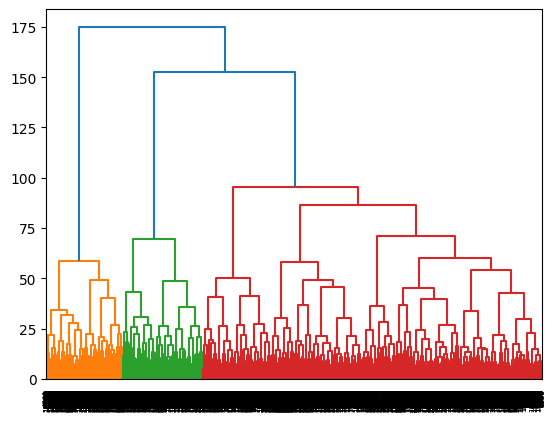

In [ ]:
dend = dendrogram(wardlink)

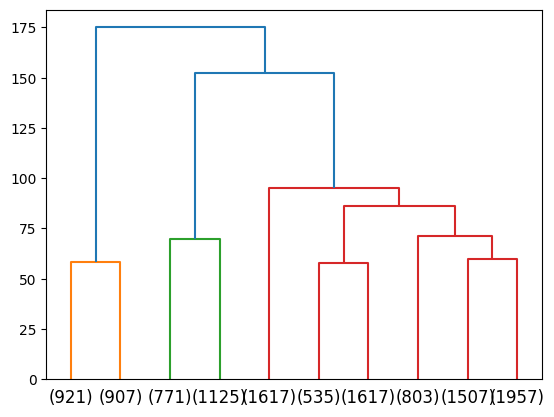

In [ ]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [ ]:
clusters = fcluster(wardlink, 100, criterion='distance')
clusters

array([2, 3, 2, ..., 3, 1, 3], dtype=int32)

In [ ]:
df_h = df_new
df_h['clusters'] = clusters
df_h.head()

,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,preferred_device,member_in_family,preferred_location_type,following_company_page,working_flag,Adult_flag,clusters
0,2.280906,0.401152,0.751797,-0.828421,0.898954,-0.090842,1.833319,-1.611938,-1.584178,-0.705974,Mobile,2,Financial,1,0,0,2
1,-0.438422,1.305515,-1.323014,-0.828421,-0.634092,-0.289462,-0.842262,0.019795,1.191438,-0.455347,Mobile,1,Financial,0,1,0,3
2,2.280906,-0.051030,1.434997,-0.828421,0.806042,-0.989117,1.068868,-1.068027,-0.658973,-0.831287,Mobile,2,Other,1,0,0,2
3,-0.438422,-0.503212,1.482897,-0.828421,-0.866371,-0.800624,-0.842262,-1.611938,0.266233,-0.705974,Mobile,4,Financial,1,0,0,3
4,-0.438422,-1.181484,-0.536451,-0.828421,-1.609666,-0.671971,2.215545,-1.475960,1.191438,-0.956600,Mobile,1,Medical,0,0,0,3


<Axes: ylabel='count'>

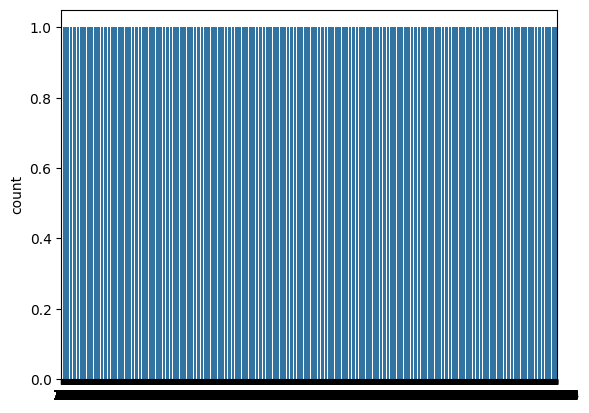

In [ ]:
sns.countplot(df_h['clusters'])

In [ ]:
df_h.clusters.value_counts().sort_index()

clusters
1    1828
2    1896
3    8036
Name: count, dtype: int64

In [ ]:
df_h['clusters'] = df_h['clusters'].astype(float)
data = df_h.iloc[:,:].groupby('clusters').mean()
data['Freq'] = df_h.clusters.value_counts().sort_index()
data = data.drop('Taken_product', axis=1)
print(data)

In [ ]:
df_h.to_csv('hc.csv')

In [ ]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

117599.99999999997

In [ ]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
k_means.inertia_

98744.66743100384

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

88230.19152035951

In [ ]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

81330.39450958063

In [ ]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

76767.52446202835

In [ ]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

72986.75025266415

In [ ]:
wss = []
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
wss

[117599.99999999997,
 98744.93975685367,
 88230.19152035951,
 81330.48248953847,
 76764.46101988856,
 73275.93407053,
 70199.88902969522,
 68181.82130502246,
 66164.85857462818,
 64518.44437941449]

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [ ]:
df_k = df.copy()
df_k["Clus_kmeans"] = labels
df_k.head()

,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Clus_kmeans
0,2.280906,0.401152,0.751797,-0.828421,0.898954,-0.090842,1.833319,-1.611938,-1.584178,-0.705974,0
1,-0.438422,1.305515,-1.323014,-0.828421,-0.634092,-0.289462,-0.842262,0.019795,1.191438,-0.455347,1
2,2.280906,-0.051030,1.434997,-0.828421,0.806042,-0.989117,1.068868,-1.068027,-0.658973,-0.831287,0
3,-0.438422,-0.503212,1.482897,-0.828421,-0.866371,-0.800624,-0.842262,-1.611938,0.266233,-0.705974,1
4,-0.438422,-1.181484,-0.536451,-0.828421,-1.609666,-0.671971,2.215545,-1.475960,1.191438,-0.956600,1


In [ ]:
silhouette_score(scaled_df,labels)

0.18470362612744112

In [ ]:
sil_width = silhouette_samples(scaled_df,labels)

df_k["sil_width"] = sil_width
df_k.head(5)

,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Clus_kmeans,sil_width
0,2.280906,0.401152,0.751797,-0.828421,0.898954,-0.090842,1.833319,-1.611938,-1.584178,-0.705974,0,0.147656
1,-0.438422,1.305515,-1.323014,-0.828421,-0.634092,-0.289462,-0.842262,0.019795,1.191438,-0.455347,1,0.181619
2,2.280906,-0.051030,1.434997,-0.828421,0.806042,-0.989117,1.068868,-1.068027,-0.658973,-0.831287,0,0.174713
3,-0.438422,-0.503212,1.482897,-0.828421,-0.866371,-0.800624,-0.842262,-1.611938,0.266233,-0.705974,1,0.247915
4,-0.438422,-1.181484,-0.536451,-0.828421,-1.609666,-0.671971,2.215545,-1.475960,1.191438,-0.956600,1,0.148057


In [ ]:
silhouette_samples(scaled_df,labels).min()

-0.05543075895524385

<Axes: ylabel='count'>

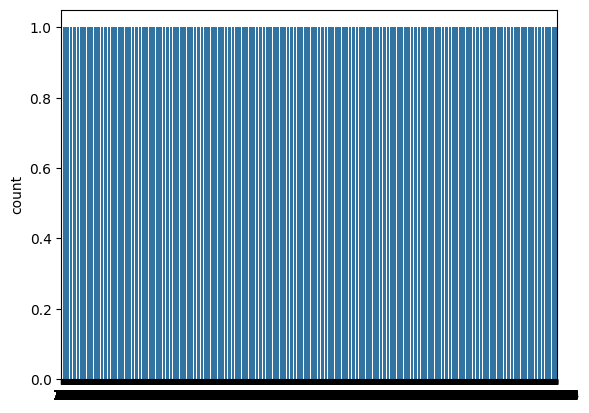

In [ ]:
sns.countplot(df_k['Clus_kmeans'])

In [ ]:
df_k[df_k['Clus_kmeans'] == 0].shape

(1760, 12)

In [ ]:
df_k[df_k['Clus_kmeans'] == 1].shape

(7375, 12)

In [ ]:
df_k[df_k['Clus_kmeans'] == 2].shape

(2625, 12)

In [ ]:
df_k.Clus_kmeans.value_counts().sort_index()

Clus_kmeans
0    1760
1    7375
2    2625
Name: count, dtype: int64

In [ ]:
clust_profile=df_k.groupby('Clus_kmeans').mean()
clust_profile['freq']=df_k.Clus_kmeans.value_counts().sort_index()
clust_profile.T

Clus_kmeans,0,1,2
Taken_product,2.280906,-0.438422,-0.297535
Yearly_avg_view_on_travel_page,-0.473109,-0.281391,1.107783
total_likes_on_outstation_checkin_given,-0.128136,0.021384,0.025834
yearly_avg_Outstation_checkins,0.189783,-0.039260,-0.016942
Yearly_avg_comment_on_travel_page,-0.031194,-0.027220,0.097390
total_likes_on_outofstation_checkin_received,-0.518131,-0.372120,1.392876
week_since_last_outstation_checkin,0.057055,-0.181517,0.471721
montly_avg_comment_on_company_page,-0.009177,-0.043999,0.129769
travelling_network_rating,-0.149584,-0.000728,0.102339
Daily_Avg_mins_spend_on_traveling_page,-0.545986,-0.368367,1.401007


In [ ]:
df_k.to_csv('km.csv')

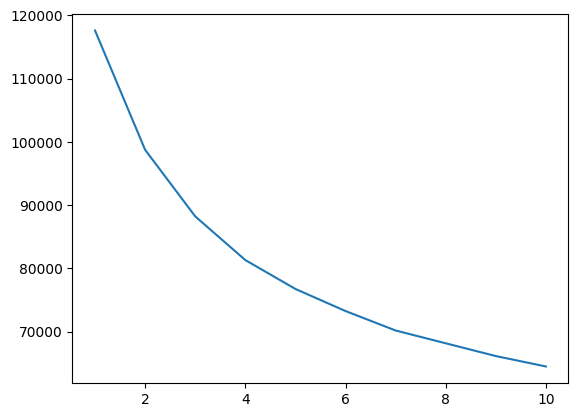

In [ ]:
plt.plot(range(1,11), wss)

## **Model Building**

In [ ]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Select Features and Define Target Variable
features = ['total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin']
target = 'Taken_product'

# Step 2: Convert Target Variable to Numerical Format
label_encoder = LabelEncoder()
df_h[target] = label_encoder.fit_transform(df_h[target])

# Step 3: Split Data
X = df_h[features]
y = df_h[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Linear Regression Model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = linear_regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.1298581450463596
R-squared Score: 0.04809182583211913


In [ ]:
# Support Vector Machine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Select Features and Define Target Variable
features = ['total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin']
target = 'Taken_product'

# Step 2: Split Data
X = df_h[features]
y = df_h[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the SVM Classifier
svm_classifier = SVC(kernel='linear')  # You can also try 'rbf' or 'poly' kernels
svm_classifier.fit(X_train, y_train)

# Step 4: Predict on Test Data
y_pred = svm_classifier.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8370181405895691
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2953
           1       0.00      0.00      0.00       575

    accuracy                           0.84      3528
   macro avg       0.42      0.50      0.46      3528
weighted avg       0.70      0.84      0.76      3528



In [ ]:
# KNN Classifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Select Features and Define Target Variable
features = ['total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin']
target = 'Taken_product'

# Step 2: Convert Target Variable to Numerical Format
label_encoder = LabelEncoder()
df_h[target] = label_encoder.fit_transform(df_h[target])

# Step 3: Split Data
X = df_h[features]
y = df_h[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the KNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Step 5: Predict on Test Data
y_pred = knn_classifier.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8752834467120182
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2953
           1       0.68      0.45      0.54       575

    accuracy                           0.88      3528
   macro avg       0.79      0.70      0.73      3528
weighted avg       0.86      0.88      0.86      3528



In [ ]:
# Naive Bayes Theorem
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Select Features and Define Target Variable
features = ['total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin']
target = 'Taken_product'

# Step 2: Convert Target Variable to Numerical Format
label_encoder = LabelEncoder()
df_h[target] = label_encoder.fit_transform(df_h[target])

# Step 3: Split Data
X = df_h[features]
y = df_h[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Naive Bayes Classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Step 5: Predict on Test Data
y_pred = naive_bayes_classifier.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8370181405895691
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2953
           1       0.50      0.00      0.00       575

    accuracy                           0.84      3528
   macro avg       0.67      0.50      0.46      3528
weighted avg       0.78      0.84      0.76      3528



In [ ]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Select Features and Define Target Variable
features = ['total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin']
target = 'Taken_product'

# Step 2: Convert Target Variable to Numerical Format
label_encoder = LabelEncoder()
df_h[target] = label_encoder.fit_transform(df_h[target])

# Step 3: Split Data
X = df_h[features]
y = df_h[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Random Forest Classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

# Step 5: Predict on Test Data
y_pred = random_forest_classifier.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9710884353741497
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2953
           1       0.99      0.83      0.90       575

    accuracy                           0.97      3528
   macro avg       0.98      0.91      0.94      3528
weighted avg       0.97      0.97      0.97      3528



In [ ]:
# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Select Features and Define Target Variable
features = ['total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin']
target = 'Taken_product'

# Step 2: Convert Target Variable to Numerical Format
label_encoder = LabelEncoder()
df_h[target] = label_encoder.fit_transform(df_h[target])

# Step 3: Split Data
X = df_h[features]
y = df_h[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

# Step 5: Predict on Test Data
y_pred = decision_tree_classifier.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9659863945578231
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2953
           1       0.91      0.88      0.89       575

    accuracy                           0.97      3528
   macro avg       0.94      0.93      0.94      3528
weighted avg       0.97      0.97      0.97      3528



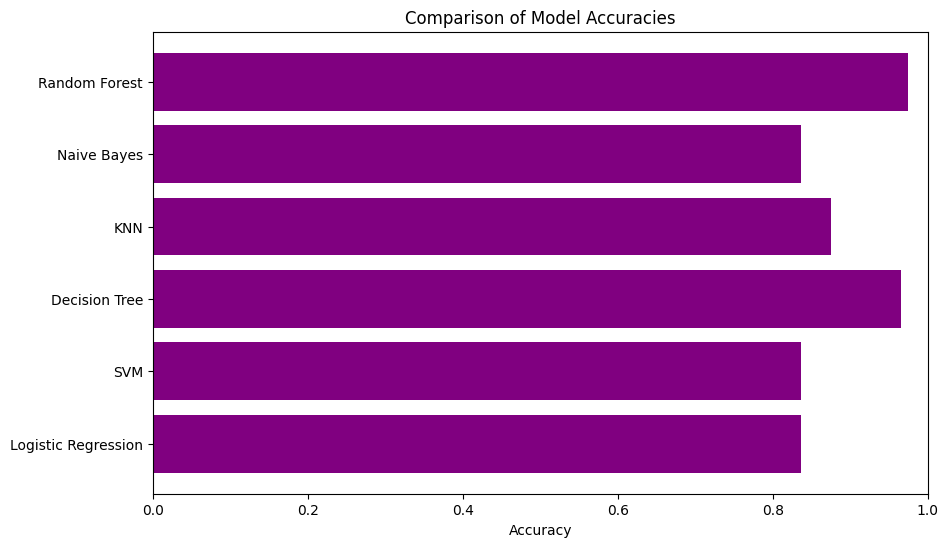

In [ ]:
# Define features and target variable
features = ['total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin']
target = 'Taken_product'

# Convert target variable to numerical format
label_encoder = LabelEncoder()
df_h[target] = label_encoder.fit_transform(df_h[target])

# Split data
X = df_h[features]
y = df_h[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier()
}

# Train models and calculate accuracies
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='purple')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xlim(0, 1)
plt.show()


## **Model Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9624640994598966


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Perform grid search with cross-validation
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params_knn = grid_search_knn.best_params_
best_accuracy_knn = grid_search_knn.best_score_

print("KNN - Best Parameters:", best_params_knn)
print("KNN - Best Accuracy:", best_accuracy_knn)

KNN - Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
KNN - Best Accuracy: 0.8923720066898762


In [ ]:
from sklearn.naive_bayes import GaussianNB

# No hyperparameters to tune for Naive Bayes

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Get the accuracy of the model
accuracy_nb = nb_classifier.score(X_test, y_test)

print("Naive Bayes - Accuracy:", accuracy_nb)

Naive Bayes - Accuracy: 0.8370181405895691


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params_dt = grid_search_dt.best_params_
best_accuracy_dt = grid_search_dt.best_score_

print("Decision Tree - Best Parameters:", best_params_dt)
print("Decision Tree - Best Accuracy:", best_accuracy_dt)

Decision Tree - Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree - Best Accuracy: 0.9499532638229529


In [ ]:
from sklearn.svm import SVC

# Define the SVM classifier
svm_classifier = SVC()

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Perform grid search with cross-validation
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params_svm = grid_search_svm.best_params_
best_accuracy_svm = grid_search_svm.best_score_

print("SVM - Best Parameters:", best_params_svm)
print("SVM - Best Accuracy:", best_accuracy_svm)

SVM - Best Parameters: {'C': 10, 'kernel': 'rbf'}
SVM - Best Accuracy: 0.8432948156410897


In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression classifier
lr_classifier = LogisticRegression()

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Perform grid search with cross-validation
grid_search_lr = GridSearchCV(estimator=lr_classifier, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params_lr = grid_search_lr.best_params_
best_accuracy_lr = grid_search_lr.best_score_

print("Logistic Regression - Best Parameters:", best_params_lr)
print("Logistic Regression - Best Accuracy:", best_accuracy_lr)

Logistic Regression - Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Logistic Regression - Best Accuracy: 0.8395289937667882


## **Comparing Before & After Tuning the Models**

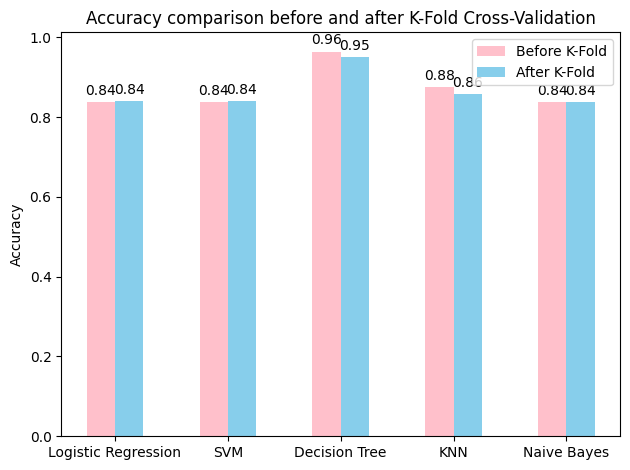

In [ ]:
from sklearn.model_selection import cross_val_score

# List to store accuracies before and after k-fold cross-validation
accuracies_before = []
accuracies_after = []

# Define a function to calculate accuracy without k-fold cross-validation
def get_accuracy(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    return accuracy

# Define a function to calculate accuracy with k-fold cross-validation
def get_cross_val_accuracy(model, X_train, y_train, cv):
    accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    return np.mean(accuracy)

# List of models
models = [
    ("Logistic Regression", lr_classifier),
    ("SVM", svm_classifier),
    ("Decision Tree", dt_classifier),
    ("KNN", knn_classifier),
    ("Naive Bayes", nb_classifier)
]

# Iterate through each model
for name, model in models:
    # Get accuracy before k-fold cross-validation
    accuracy_before = get_accuracy(model, X_train, y_train, X_test, y_test)
    accuracies_before.append(accuracy_before)

    # Get accuracy after k-fold cross-validation
    accuracy_after = get_cross_val_accuracy(model, X_train, y_train, kfold)
    accuracies_after.append(accuracy_after)

# Custom colors for bars
colors_before = ['#FFC0CB', '#FFC0CB', '#FFC0CB', '#FFC0CB', '#FFC0CB']  # Pink
colors_after = ['#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB']  # Sky Blue

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, accuracies_before, width, label='Before K-Fold', color=colors_before)
bars2 = ax.bar(x + width/2, accuracies_after, width, label='After K-Fold', color=colors_after)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy comparison before and after K-Fold Cross-Validation')
ax.set_xticks(x)
ax.set_xticklabels([name for name, _ in models])
ax.legend()

# Add value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.2f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

fig.tight_layout()

plt.show()